<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/Lab03_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris (1).csv to iris (1).csv


In [3]:
df = pd.read_csv("iris (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Independent variables
y = df['species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


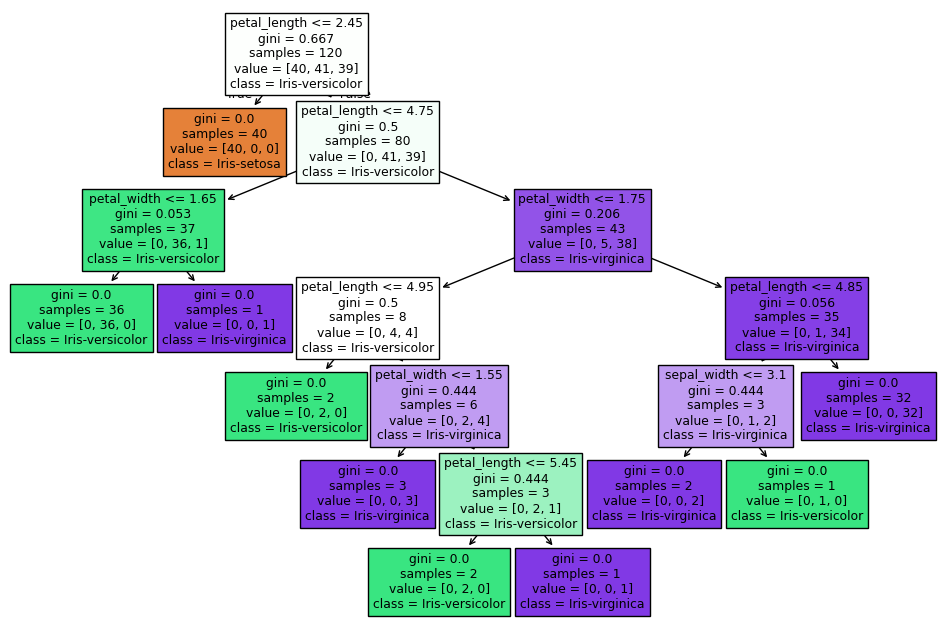

In [19]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_.astype(str),
    filled=True
)
plt.show()

In [31]:
from google.colab import files
uploaded = files.upload()

Saving drug.csv to drug.csv


In [32]:
df = pd.read_csv("drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [33]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [38]:
from sklearn.preprocessing import OrdinalEncoder

# Make a copy of the data
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].copy()

# Columns to encode
categorical_cols = ['Sex', 'BP', 'Cholesterol']

# Apply encoding
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

y = df['Drug']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 1.00
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


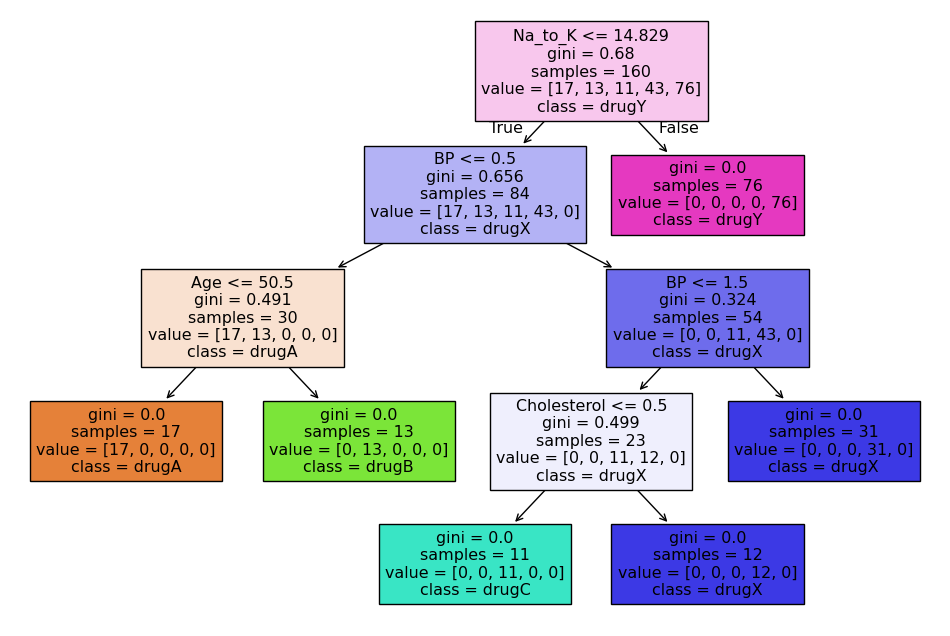

In [43]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_.astype(str),
    filled=True
)
plt.show()

In [44]:
from google.colab import files
uploaded = files.upload()

Saving petrol_consumption.csv to petrol_consumption (1).csv


In [45]:
df = pd.read_csv("petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [46]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [48]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',
          'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
regressor = DecisionTreeRegressor()

In [51]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
y_pred = regressor.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 86.50
Mean Squared Error: 15607.70
Root Mean Squared Error: 124.93


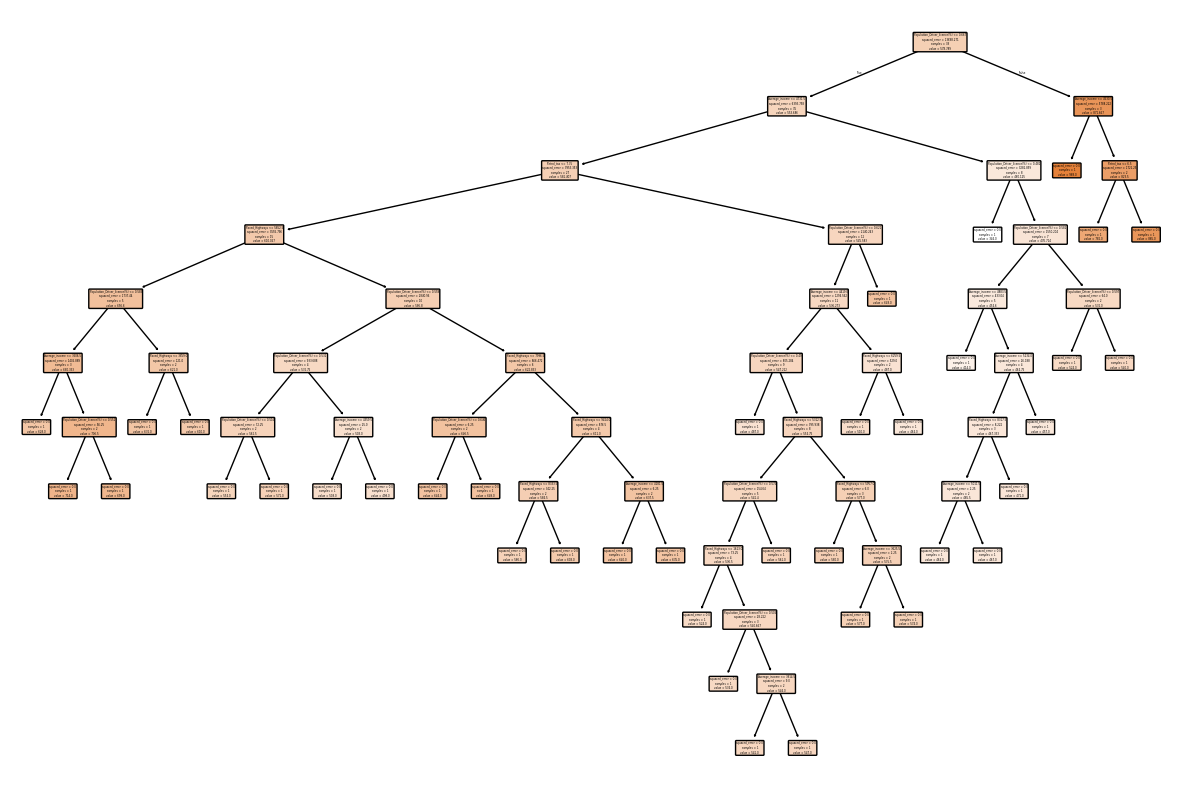

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']].columns, filled=True, rounded=True)
plt.show()